# פרויקט מסכם- בינה עסקית

שמות מגישים:
ים הדס - 318810553
אפי לדר - 316012236
חן בשארי - 315341180
גל ברדוגו - 318434107


# 1. שאלה עסקית + KPIS

אנחנו חברת תקליטים בשם "אפקהדאנס" ואנו מעוניינים להוציא את להיט הפופ הבא שיכבוש את ראש המצעדים, על מנת לקבל תמלוגים גבוהים ולהרוויח. לשם כך ננתח את נתוני הלהיטים בעבר על מנת למצוא את מאפייני השירים המושמעים ביותר. מצאנו DATA set  של 100 השירים המושמעים ביותר בעשור האחרון באפליקציית Spotify (הנתונים עדכניים מ2011-2021).
בDATASET שמצאנו השירים מאופיינים ע"י הקטגוריות הבאות – אורך השיר, סגנון, שנה, BPM, רמת אנרגיה, עוצמת דציבל, כמה ניתן לרקוד אותו, אקוסטיות, אחוז המילים בשיר ולבסוף פופולריות שזהו הפרמטר אותו נרצה למקסם.


השאלה העסקית - האם שירים בסגנון dance pop בעלי energy מעל 65, שאורכם פחות מ-200 שניות יותר פופולריים מאשר שירים בסגנון pop בעלי energy מעל 65, שאורכם יותר מ-200 שניות?
סט הנתונים שבחרנו הוא-  Top 100 Most Streamed Songs on Spotify | Kaggle


# 2. הגדרת Data Warehouse

a.	בחרנו בסכמת STAR. כדי שנוכל לענות שאלת המחקר שלנו אנו נדרשים לייצר טבלה מרכזית אחת המכילה בתוכה את הממדים והמדדים. בנוסף נציין כי הסכמה היא קלה להבנה ופשוטה לדירוג היררכי.


b.	תיאור הdata warehouse באמצעות ERD:

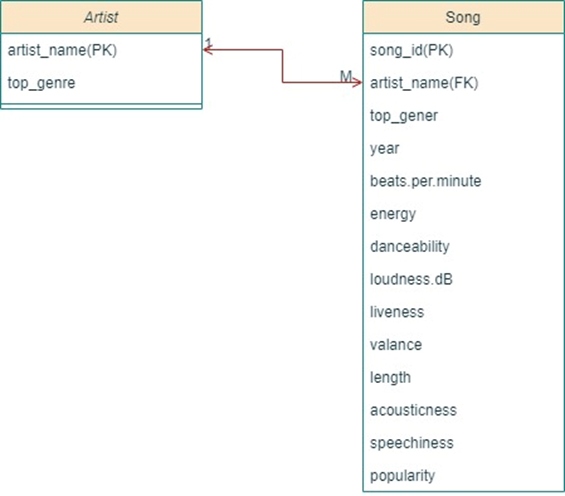


c.	חברת ההפקות המוזיקלית מעוניינת להפיק אלבום חדש ורוצה לדעת כיצד המאפיינים של ,energy אורך השיר, משפיעים על הפופולריות שלו. STAR היא סכמה שיכולה לעזור לחברת ההפקות בשליפה מהירה של המאפיינים הרצויים ללא ריבוי של .joins


# 3. תהליך הETL


•	 עבור אוסף הנתונים:

Extraction
- בשלב זה נחלץ את הנתונים מטבלאות המקור
artist ו- .songs

Transformation –
 בשלב זה העברנו את הנתונים שחילצנו למודל טבלאי אחד. כעת נבצע סינון של העמודות הרלוונטיות בהתאם לשאלה העסקית.

Load – בשלב זה נטעין את הנתונים שחילצנו ל.DW



מימוש תהליך ע"י STTM במתודולוגיית תכנות מונחה עצמים:

שלב 1:  Reference data

 בשלב זה נגדיר את סט הנתונים המורכב מ2 טבלאות: ARTIST וSONG, אותן נגדיר באמצעות השדות הרלוונטיים.

שלב 2:

 Extract from data reference בשלב זה חילוץ של הנתונים ע"י קובץ CSV.

שלב 3:בData validation

בשלב זה נוודא כי הנתונים הקיימים מתאימים למטרת הפרויקט, כלומר נוודא שקיימים המאפיינים של סגנון השיר, BPM, אורך השיר ומידת הפופולריות שלו.

שלב 4: Transformation data

 בשלב זה נבצע אימות של שילוב המידע מתוך הטבלאות בהן השתמשנו. שלב זה כולל ניקוי של הדאטה, במקרה שלנו לא הופיעו בנתונים ערכים חסרים או חריגים ולכן לא היה צורך בכך.
מחקנו עמודות לא רלוונטיות מתוך סט הנתונים:
מטבלת ARTIST : ARTIST, YEAR.

מטבלת SONGS:  TITLE, ENERGY , DANCEABILITY , LOUDNESS , LIVENESS,VALANCE , AOUSTICNESS , SPEECHINESS.

שלב 5: Stage :

 שלב זה הוא שלב ביניים בו כל הנתונים נמצאים באזור ה STAGING בתוכנות כמו TABLEAU או AIRFLOW, דרכן הנתונים עוברים.

שלב 6: Publish to data warehouse

 בשלב זה העברנו את הנתונים הרלוונטיים לאחר עיבודם למחסן נתונים שמורכב מטבלה אחת בה יהיו המפתחות של השירים והאמנים.



In [ ]:
import pandas as pd
import sqlite3

class SongETL:
    def __init__(self):
        self.song_data = None
        self.artist_data = None

    def extract_songs_data(self):
        try:
            self.song_data = pd.read_csv('Top 100 most Streamed - Sheet1.csv', encoding='latin-1')
            self.song_data.dropna(inplace=True)
            print("Product data column names:")
            print(self.song_data.columns)
        except FileNotFoundError:
            print("Top 100 most Streamed - Sheet1.csv file not found.")

    def extract_artist_topgenere_data(self):
        try:
            self.artist_data = pd.read_csv('artist-topgenere.csv')
            self.artist_data.dropna(inplace=True)
            print("Transaction data column names:")
            print(self.artist_data.columns)
        except FileNotFoundError:
            print("artist-topgenere.csv file not found.")

    def transform_data(self):
        merged_data = pd.merge(self.song_data, self.artist_data, on='artist')

        # Calculate the most popular beats.per.minute Song
        most_popular_bpm = merged_data.groupby('beats.per.minute')['popularity'].sum().idxmax()
        # Calculate the most popularity length
        most_popular_length = merged_data.groupby('length')['popularity'].sum().idxmax()
        # Calculate the most popularity artist
        most_popular_artist = merged_data.groupby('artist')['popularity'].sum().idxmax()
        # Calculate the most popularity genere
        most_popular_year = merged_data.groupby('year')['popularity'].sum().idxmax()


        transformed_data = {
            'most popular beats.per.minute range': most_popular_bpm,
            'most popular length ': most_popular_length,
             'Most popular Artist':  most_popular_artist,
            'most_popular year': most_popular_year
        }
        return transformed_data



    def save_data_warehouse(self):
        self.extract_songs_data()
        self.extract_artist_topgenere_data()
        transformed_data = pd.DataFrame(self.transform_data(), index=[0])
        transformed_data.to_csv('songs.csv', index=False)
        transformed_data.to_excel('songs.xlsx', index=False)
        print("Data saved.")
        print("Location (CSV): songs.csv")
        print("Location (XLSX): songs.xlsx")
        print("Transformed Data:")
        print(transformed_data)

etl = SongETL()
etl.save_data_warehouse()


Product data column names:
Index(['title', 'artist', 'top genre', 'year', 'beats.per.minute', 'energy',
       'danceability', 'loudness.dB', 'liveness', 'valance', 'length',
       'acousticness', 'speechiness', 'popularity'],
      dtype='object')
Transaction data column names:
Index(['artist', 'top genre'], dtype='object')
Data saved.
Location (CSV): songs.csv
Location (XLSX): songs.xlsx
Transformed Data:
   most popular beats.per.minute range  most popular length   \
0                                   90                   220   

  Most popular Artist  most_popular year  
0         Post Malone               2018  


# 4. ניתוח DATA WAREHOUSE

In [ ]:
SELECT song_id, top_genere, energy, AVG(energy)
FROM Song
OVER(PARTITION BY top_genere) as Avgenergy;

SELECT song_id, popularity
FROM Song
ORDER BY popularity DESC as Psong;


SELECT song_id, top_genere, energy, COUNT(song_id)
FROM Song
OVER(PARTITION BY top_genere) as CountSongs;



SELECT song_id,danceabillity, popularity
FROM Song
ORDER BY danceabillity DESC as Dancesong;



SELECT song_id, popularity, AVG(length)
FROM Song
OVER(PARTITION BY top_genere ORDER BY popularity) as AvgLength;



SELECT song_id, artist_name, popularity, Count(song_id)
FROM Song and Artist
OVER(PARTITION BY artist_name ORDER BY popularity) as CountSongs;



SELECT song_id, year ,popularity
FROM Song
ORDER BY year  between 2011 and 2021 as Ysong;



SELECT case WHEN energy > 200 THEN 'high_energy else ‘low_energy' end as Song_energy
FROM Song
AVG(popularity) as avg_popularity, length
GROUP BY Song_energy
ORDER BY length desc;


SELECT case WHEN energy = 200 AND length = 65 THEN '1' else '0' end as suspect_as_Hit, song_id, artist_name
FROM Song as S and artist as A;


SELECT case WHEN energy > 200 AND length < 65 THEN '1' else '0' end as suspect_as_Hit, popularity,
FROM Song
GROUP BY suspect_as_Hit
ORDER BY popularity;



# 5. מסקנות


1)	אורך השיר הפופלארי ביותר הוא 214 שניות


2)	הז'אנר הכי מושמע מבין כל השירים הוא Dance pop


3)	אקוסטיות של שיר הפופולארית ביותר היא 24.95


4)	עוצמת הקול של שיר המועדפת ביותר היא -6.1


5)	מספר המקובל לפעימות לדקה של שיר הוא 116.97


אחרי בדיקה מעמיקה של כל הנתונים וחקירתם אלו חלק מהמסקנות שהגענו אליהם.
על מנת שנוכל להרכיב את השיר המושמע ביותר, אשר יביא לנו הכי הרבה אהדה ופופלאריות מקרב המאזינים הוא צריך לכלול את כלל הקטגוריות הללו speechiness),  popularity, acousticnes,וכו')
אשר יכילו נתונים אלו וכך נשיג את השיר הטוב ביותר.


# 6. ניהול גרסאות

https://github.com/EfiLeder/BI-Project